In [229]:
import numpy as np
import matplotlib.pyplot as plt

In [230]:
class Stencil:
    def __init__(self, order=2):
        self.stencil = [1,-2,1]
        self.n = len(self.stencil)
        self.c = self.n // 2

In [231]:
"""
Simple 1D multigrid for u'' = 1, u(0)=u(6h)=0

0123456
|-----|
"""
N = 5

A_h = np.zeros((N,N))
stl = Stencil()
print(stl.c)


A_h[0,:stl.n-stl.c] = stl.stencil[stl.c:stl.n]
for i in range(stl.c,N-stl.c):
    A_h[i,i-stl.c:i+stl.c+1] = stl.stencil[:]
A_h[-1,N-stl.n+1:] = stl.stencil[:-1]

f_h = -np.ones(N)
u_h = np.zeros(N)

R_h = 0.25*np.array([[1,2,1,0,0],[0,0,1,2,1]])
I_h = 2.0*R_h.T

1


In [232]:
A_h

array([[-2.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -2.]])

In [239]:
# single iteration, single level
def singleiteration(u_h):
    r_h = f_h - np.matmul(A_h,u_h)
    r_2h = np.dot(R_h, r_h)
    A_2h = np.dot(R_h, np.dot(A_h, I_h))
    e_2h = np.linalg.solve(A_2h, r_2h)
    e_h = np.dot(I_h, e_2h)
    return e_h

In [240]:
for i in range(1000):
    u_h += singleiteration(u_h)

In [241]:
print("u_h = ", u_h)
print("e_h = ", e_h)

u_h =  [2. 4. 4. 4. 2.]
e_h =  [-0.0703125 -0.140625  -0.140625  -0.140625  -0.0703125]


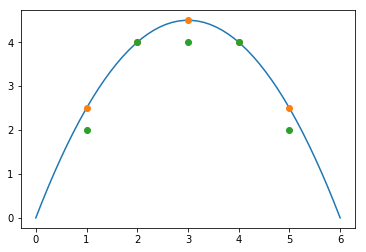

In [242]:
usol_f = lambda x: -0.5*x**2 + 3*x
x = np.linspace(0,6)
xg = np.arange(1,6)
usol = usol_f(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, usol)
ax.plot(xg, usol_f(xg), 'o')
ax.plot(xg, u_h, 'o')

In [244]:
np.dot(A_h, u_h)-f_h

array([ 1., -1.,  1., -1.,  1.])

In [238]:
class MultiGrid1D:
    def __init__(self, N=5):
        self.N = N
        assert(N>=5)
        self.stl = Stencil()
        self.A_h = self.setA()
        

    def setA_h(self):
        stl = Stencil()
        A_h = np.zeros((N,N))
        A_h[0,:stl.n-stl.c] = stl.stencil[stl.c:stl.n]
        for i in range(stl.c,N-stl.c):
            A_h[i,i-stl.c:i+stl.c+1] = stl.stencil[:]
        A_h[-1,N-stl.n+1:] = stl.stencil[:-1]
        
    def setR_h(self):
        

f_h = -np.ones(N)
u_h = np.zeros(N)

R_h = 0.25*np.array([[1,2,1,0,0],[0,0,1,2,1]])
I_h = 2.0*R_h.T

IndentationError: expected an indented block (<ipython-input-238-4d1b3fd18411>, line 20)